In [27]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: plotting and visualization
# @created date: 2019/07/17
# @last midification:

In [28]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
# use interactive plotting in jupyter notebook
%matplotlib notebook 

#### A brief matplotlib API Primer

In [29]:
data = np.arange(10)

In [30]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


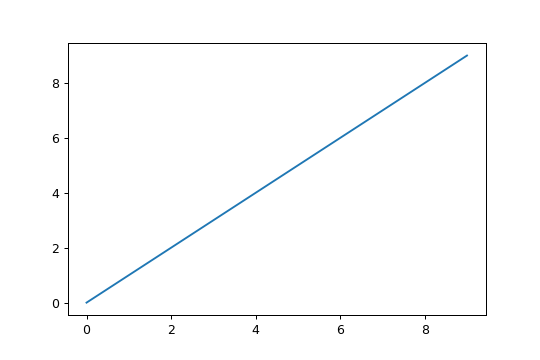

In [31]:
plt.plot(data)

<IPython.core.display.Javascript object>


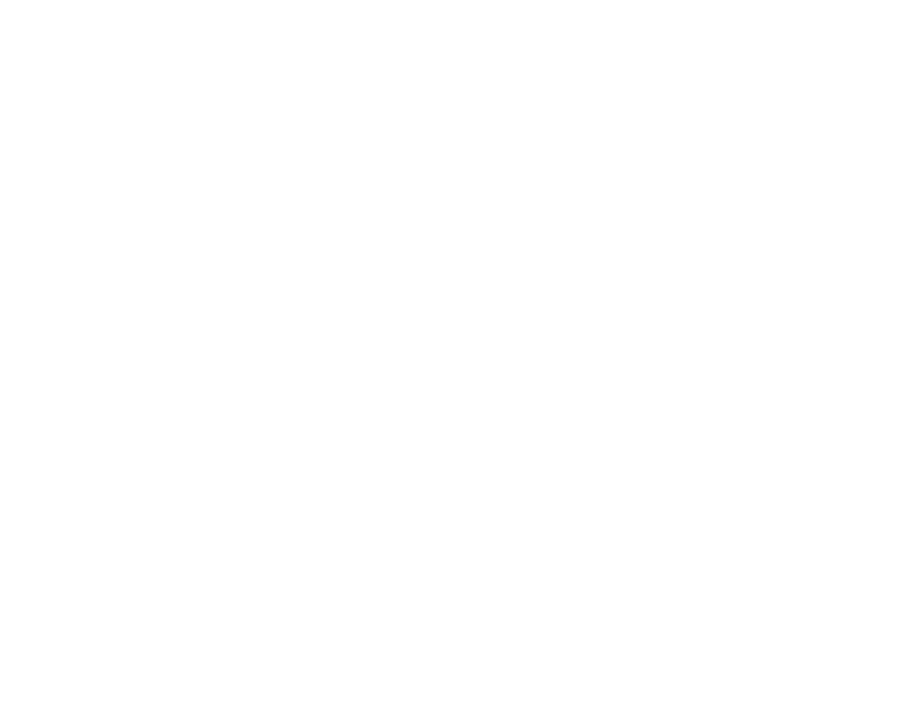

In [39]:
fig = plt.figure(figsize=(10, 8))

In [32]:
ax1 = fig.add_subplot(2, 2, 1)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [33]:
ax2 = fig.add_subplot(2, 2, 2)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [34]:
ax3 = fig.add_subplot(2, 2, 3)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


>One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.

<IPython.core.display.Javascript object>


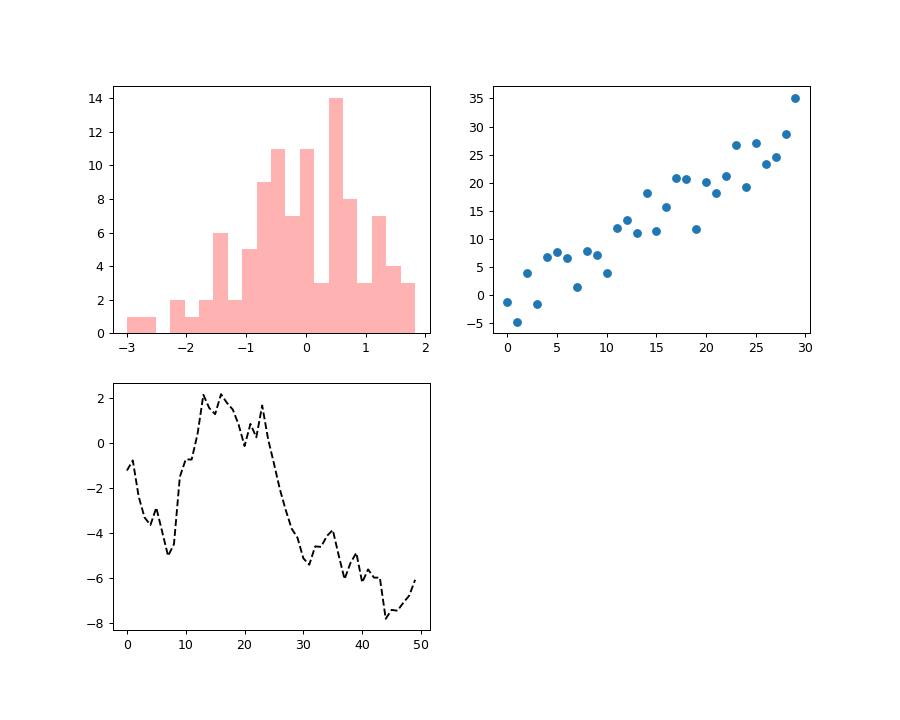

In [37]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When we issue a plotting command like pl.plot([1.,5 6, 3.6, 25]), matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation. So if we add the following command, we'll get something like Figure 9-1:

In [38]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The "k--" is a *style* option instructing matplotlib to plot a black dashed line. The objects returned by *fig.add_subplot*() are AxesSubplot object, on which we can directly plot on the other empty subplots by calling each one's instance method:

In [43]:
_ = ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.3)

In [44]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

We can find a comprehensive catalog of plot types in the matplotlib documentation.

Creating a figure with a grid of subplots is a very common task, so matplotlib provides a convenient method, *plt.subplots*(), that creates a new figure and returns a NumPy array containing the created subplot objects:  

<IPython.core.display.Javascript object>


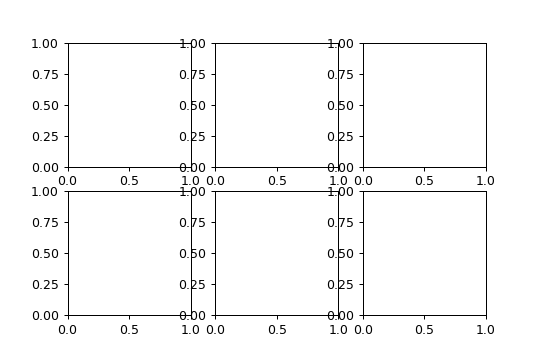

In [45]:
fig, axes = plt.subplots(2, 3)

In [46]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019ADC8ABD30>,
      dtype=object)

This is very useful, as the *axes* can be indexed like a two-dimensional array; for example, *axes*[0,1]. We can indicate that subplots should have the same x- or y-axis using *sharex* and *sharey* options, respectively. This is especially usefull when we compare data on the same scale; otherwise, matplotlib will autoscale plot limits independently. More detail about this funciton:  
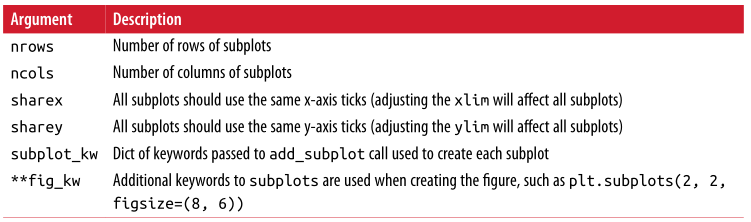

#### Adjusting the spaciing around subplots

By default, matplotlib leaves a certain amount of padding outside the subplots and spacing between subplots. This spacing is specified relative to the height and width of the plot, so that if we resize the plot programmatically or manually using the GUI window, the plot will dynamically adjust itself. We can change the spacing using the *subplots_adjust*() method on Figure objects, also available as a top-level function:  
subplots_adjust(left=None, bottom=None, right=None, top=None,
wspace=None, hspace=None)

*wspace* and *hspace* controls the percent of the figure width and figure height, respectively, to use as spacing between subplots. For example:

<IPython.core.display.Javascript object>


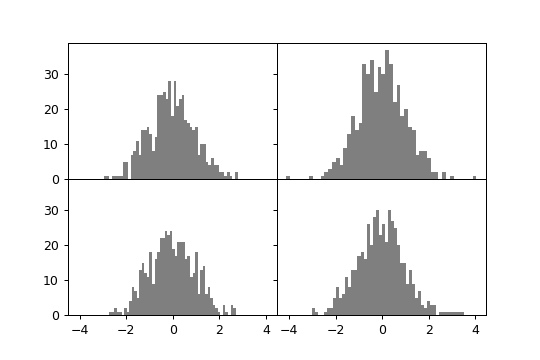

In [49]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


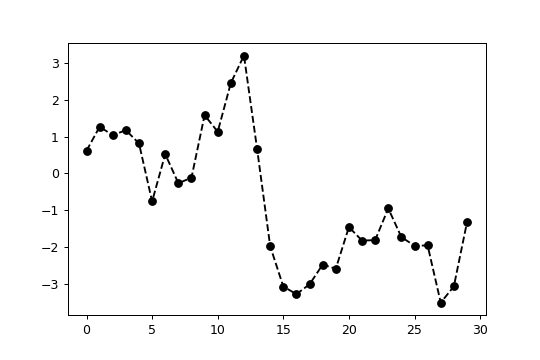

In [50]:
plt.subplots()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

This could also have been written explicitlt as:

<IPython.core.display.Javascript object>


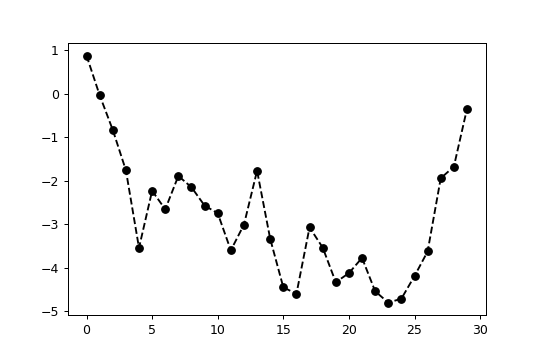

In [51]:
plt.subplots()
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you may notice that subsequent points are linearly interploated by default. This can be altered with the *drawstyle* option:

In [52]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


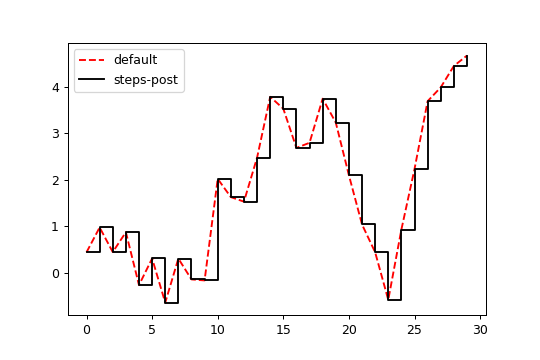

In [53]:
plt.subplots()
plt.plot(data, 'r--', label='default')

In [54]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [55]:
plt.legend(loc='best')

#### Ticks, Labels and Legends

For most kinds of decorations, there are two ways to do things: using the procedural *pyplot* interface (i.e., *matplotlib.pyplot*) and the more obejct-oriented native matplotlib API.  
  
The **pyplot** interface, designed for interactive use, consists of methods like *xlim*(), *xtick*() and *xticklabel*(). These control the plot range, tick locations and tick labels, respectively. They can be used in two ways:  
(1) Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range);  
(2) Called with parameter sets the parameter value (e.g., plt.xlim([, 10]) sets the x-axis range to 0 to 10)

All such methods act on the active or the most recently created AxesSubplot. Each of them corresponds to two methods on the subplot object itself; in the case of *xlim*(), they are *ax.get_xlim*() and *ax.set_xlim*().

#### Setting the title, axis labels, ticks and ticklabels

To illustrate customizing the axes. We will create a simple figure and plot of a random walk:

<IPython.core.display.Javascript object>


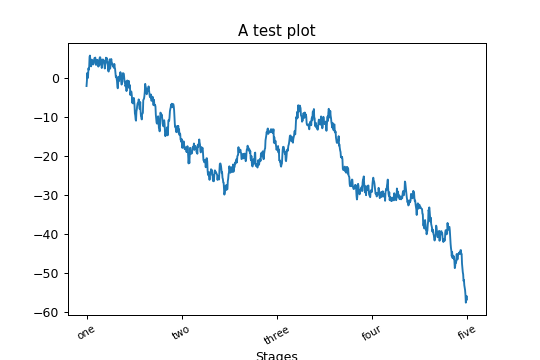

In [57]:
fig = plt.figure()

In [58]:
ax = fig.add_subplot(1, 1, 1)

In [59]:
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it's easiest to use *set_xticks*() and *set_xticklabels*(). The former instructs matplotlib where to place the ticks along the data range; by default, these locations will also be the labels. But we can set any other values as the labels using *set_xticklabels*():

In [60]:
# 设置标签的位置
tick = ax.set_xticks([0, 250, 500, 750, 1000])

In [61]:
# 在上述这些位置设置标签的值
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

In [62]:
# 设置x轴的标题
ax.set_xlabel('Stages')

Text(0.5, 8.652245962155614, 'Stages')

Modifying the y-axis consisits of the same process, substituting (替代) y for x in the above. The axes class also has *set*() method that allows batch setting of plot properties. From the prior example, we could also have written:

In [63]:
props = {'title': 'A test plot',
        'xlabel': 'Stages'}
ax.set(**props)

[Text(0.5, 8.652245962155614, 'Stages'), Text(0.5, 1.0, 'A test plot')]

#### Adding legends

Legends are another critical element for identifying plot elements. There are a number of ways to add one. The easiest is to pass *label* argument when adding each piece of the plot:

<IPython.core.display.Javascript object>


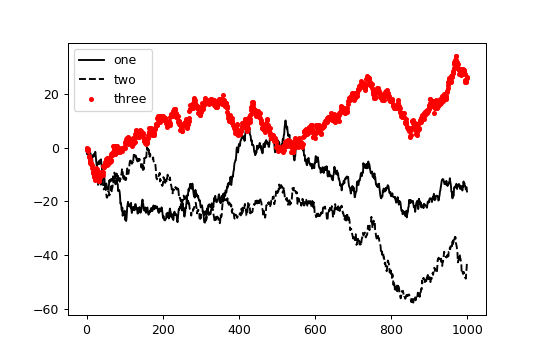

In [64]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [65]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [66]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

In [67]:
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')

Once we done this, we can either call *ax.legend*() or *plt.legend*() to automatically create a legend:

In [68]:
ax.legend()

The methdd *legend*() has several other choices for the location *loc* argument. See the docstring (with *ax.legend?*) for more information:

The *loc* tells matplotlib where to place the plot. If you aren't picky (挑剔的), 'best' is a good option, as it will choose a location that is most out of the way. To exlucde one or more elements from the legend, pass no label or label='_nolegend_'.

#### Annotation and Drawing on Subplot

In addditon to standard plot types, you may wish to plot your own annotations, which could consist of text, arrow, or other shapes. We can add annotations and text using *text*(), *arrow*() and *annotate*() functions. *text*() draws a text at given coordinates (x, y) on the plot with optional styling:  
&emsp;&emsp;&emsp;&emsp;**ax.text(x, y, "Hello, world", family='monospace', fontsize=10)**  
Let's consider an example below:

In [70]:
from datetime import datetime

<IPython.core.display.Javascript object>


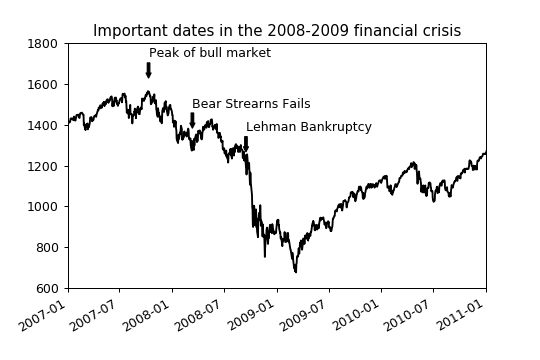

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [72]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# import the spx.csv data
data = pd.read_csv('./examples/spx.csv', index_col=[0], parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k')
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), 'Bear Strearns Fails'),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4,width=2,
                              headlength=4),
                horizontalalignment='left', verticalalignment='top'
               )
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')




In [80]:
spx[:8]

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
1990-02-08    332.96
1990-02-09    333.62
1990-02-12    330.08
Name: SPX, dtype: float64

In [82]:
# 返回日期1990/02/05之前不为空值的那一行数据
spx.asof(datetime(1990, 2, 5))

331.85

*asof*()函数的说明：

In [83]:
df = pd.DataFrame(np.arange(32).reshape(8, 4), columns=['one', 'two', 'three', 'four'])

In [84]:
df

,one,two,three,four
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31


In [86]:
df.index = [0, 2, 4, 6, 8, 10, 12, 14]

In [87]:
df

,one,two,three,four
0,0,1,2,3
2,4,5,6,7
4,8,9,10,11
6,12,13,14,15
8,16,17,18,19
10,20,21,22,23
12,24,25,26,27
14,28,29,30,31


In [88]:
df.asof(3)

one      4.0
two      5.0
three    6.0
four     7.0
Name: 3, dtype: float64

To add a shape to a plot, we can create the patch object *shp* and add it to a subplot by calling *ax.add_patch*(shp):

<IPython.core.display.Javascript object>


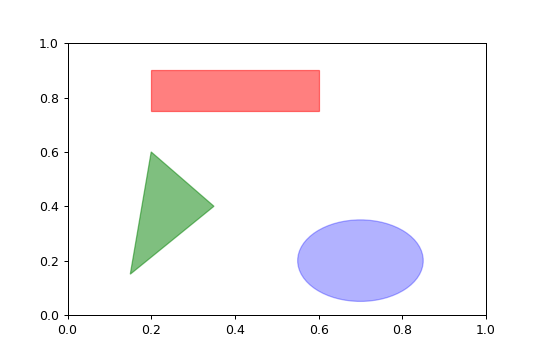

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='r', alpha=0.5)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### Saving Plots to File

We can save the active figure to file using *plt.savefig*(), This is equivalent to the figure object's *savefig*() instance method. For example, to save a SVG version of a figure, we only type:  
&emsp;&emsp;&emsp;plt.savefig('figpath.svg')

>The file type is inferred from the file extension, so if we want to save as a PDF file, use .pdf instead. There are a couple of important options that I use frequently for publishing graphics: **dpi**, which controls the dots-per-inch resolution, and **bbox_inches**, which can trim the whitespace around the actual figure. To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, we can do:

In [90]:
plt.savefig('./examples/figpath.png', dpi=400, bbox_inches='tight')

*savefig*() doesn't have to write to disk, it can also write to any file-like object, such as a BytesIO:

In [91]:
from io import BytesIO

In [92]:
buffer = BytesIO()
plt.savefig(buffer)

In [93]:
plot_data = buffer.getvalue()

Below is some more detail about other options for *savefig*():  
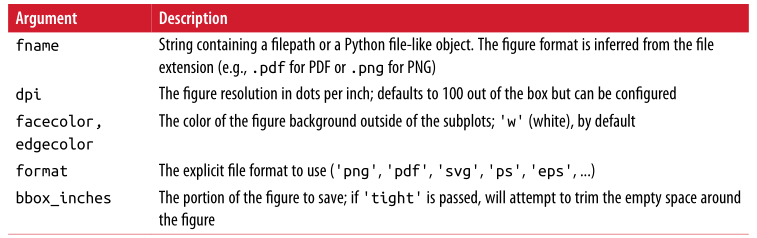

#### matplotlib Configuration

matplotlib 配置了配色方案和默认值，这些默认值主要用准备进行出版的图片。幸运的是，几乎所有的默认值都可以通过一个扩展的包含全局参数的集合自定义，这些全局参数控制了图形的大小，子图间的间距，颜色，字体大小，网格样式等等。通过编程的方法去修改这些配置方法之一是实用*rc*()，比如全局设置图片的默认大小为10 $\times$ 10:  
&emsp;&emsp;&emsp;plt.rc("figure", figsize=(10, 10))

*rc*()方法的第一个参数是所要自定义的组件，比如"figure", "axes", "xtick", "ytick", "grid", "legend"等等，其它参数通过键值对的方式进行配置。比较简单的配置是将在配置写在一个字典里：

font_options = {'family': "monospace",  
&emsp;&emsp;&emsp;'weight': 'bold',  
&emsp;&emsp;&emsp; 'size': 'small'  
&emsp;&emsp;&emsp;}  
plt.rc('font', **font_options)

对于更多的自定义，为了查看其所有的选项，matplotlib提供了一个配置文件*matplotlibrc*在matplotlib/mpl-data目录下。如果你自定义了这个文件，并将其放在你的家目录下并命名为*.matplotlibrc*，这个文件将在每一个你使用matplotlib的时候加载到环境中。

#### Plotting with pandas and seaborn

matplotlib can be very low-level tool. You assemble a plot from its base components: the data display (i.e., the type of the plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.  
在pandas中，沿着行标签和列标签，我们可能多个数据。pandas自身内置了函数用于简化DataFrame和Series对象的可视化。另外一个库是seaborn，一个由Michael Waskom开发的统计图形库，seaborn简化了很多常用的可视化类型。

#### Line Plots

Series and DataFrame each have a *plot* attribute for making some basic plot types. By default, *plot*() makes line plots:

In [95]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


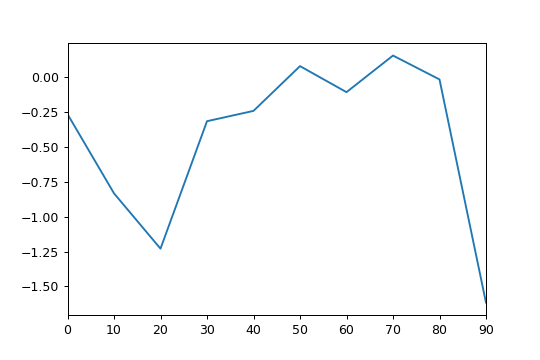

In [98]:
plt.subplots()
s.plot()

Series对象的索引被传到matplotlib中去绘制X轴，我们可以通过参数*use_index=False*禁止。  
The x-axis ticks and limits can be adjusted with *xticks* and *xlim* options, and y-axis resepctively with *ytciks* and *ylim*. Below is a full listing of plot options:  
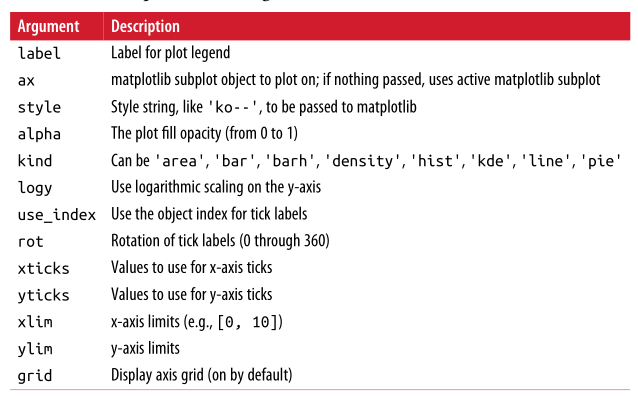  
  
Most of pandas's plotting methods accept an optional *ax* parameter, which can be a matplotlib subplot object. This give a more flexible placement of subplots in a grid layout.  
  
DataFrame's *plot*() method plots each of columns as a different line on the same subplot, creating a legend automatically:

In [99]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


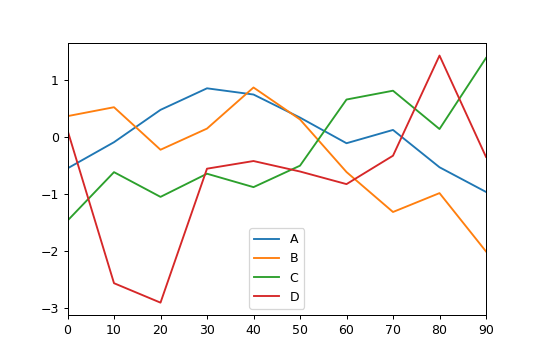

In [104]:
df.plot()

The *plot* attribute contain a "family" of methods for different plot types. For example, *df.plot*() is equivalent to *df.plot.line*().

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate sublots. More detail:  
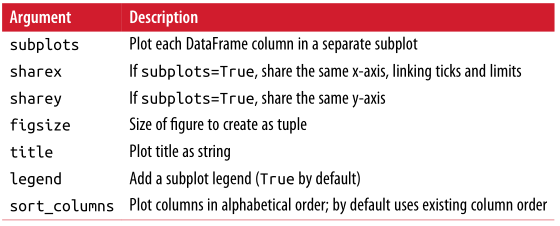

<IPython.core.display.Javascript object>


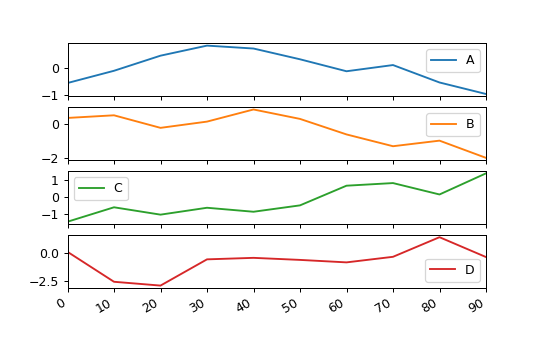

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AE3CA45F8>,
      dtype=object)

In [106]:
df.plot(subplots=True)

#### Bar Plots

The *plt.bar*() and *plt.barh*() make vertical and horizontal bar plots, respectively. In this case, DataFrame or Series index will be used as the x (*bar*) or y (*barh*) ticks:

<IPython.core.display.Javascript object>


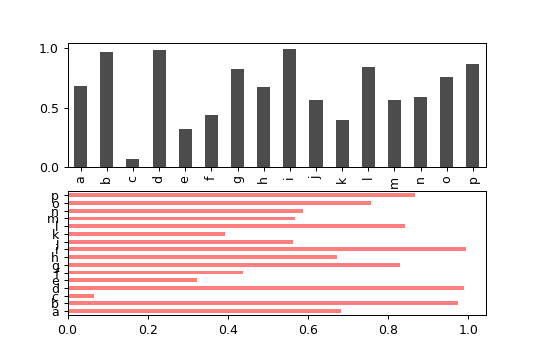

In [107]:
fig, axes = plt.subplots(2, 1)

In [108]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [109]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [110]:
data.plot.barh(ax=axes[1], color='r', alpha=0.5)

With DataFrame, bar plots group the values in each row together in a group in bars, side bye side, for each value:

In [111]:
df = pd.DataFrame(np.random.rand(6, 4),
....: index=['one', 'two', 'three', 'four', 'five', 'six'],
....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [112]:
df

Genus,A,B,C,D
one,0.599916,0.186924,0.673728,0.991943
two,0.037114,0.235804,0.250333,0.565703
three,0.430865,0.068612,0.418569,0.071722
four,0.027903,0.029090,0.491860,0.334296
five,0.480413,0.972073,0.442033,0.992584
six,0.899544,0.134332,0.517693,0.482745


<IPython.core.display.Javascript object>


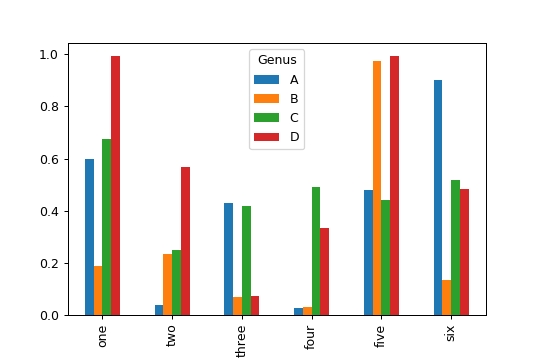

In [113]:
df.plot.bar()

>注意图鉴的"Genus"名称。

我们也可以通过传入参数*stacked*=True创建堆叠的直方图，DataFrame中的每一行将会堆叠在一起：

<IPython.core.display.Javascript object>


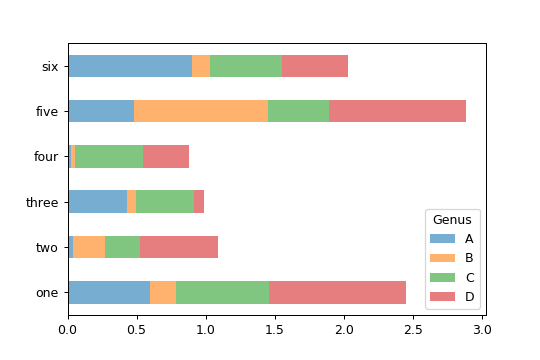

In [120]:
df.plot.barh(stacked=True, alpha=0.6)

>A useful recipe for bar plot to visualize a Series's value frequency using *value_counts*(): s.value_counts().plot.bar().

<IPython.core.display.Javascript object>


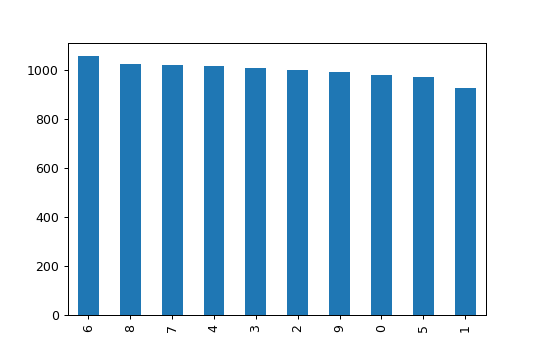

In [124]:
plt.subplots()
s = pd.Series(np.random.randint(0, 10, 10000))
s.value_counts().plot.bar()

In [125]:
tips = pd.read_csv('./examples/tips.csv')

In [126]:
tips[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [128]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [129]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [132]:
party_counts = party_counts.loc[:, 2:5]

In [133]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Then, normalize so that each row sums to 1 and make the plot:

In [136]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [137]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [138]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

<IPython.core.display.Javascript object>


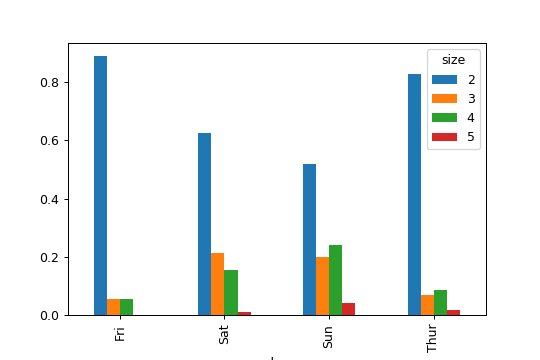

In [144]:
party_pcts.plot.bar()

So we can see that the party sizes appear to increase on the weekend in this dataset.  
  
With data that requires aggregation or summarization before making a plot, using the *seaborn* package can make the things much simpler. Let's look now at the tipping percentage by day with *seaborn*:

In [141]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [142]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


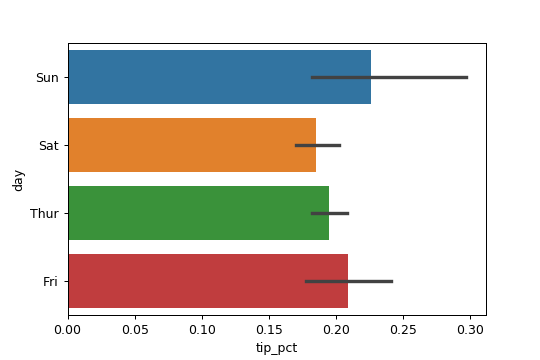

In [145]:
plt.subplots()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in *seaborn* take an *data* argument, which can be a pandas DataFrame. The other arguments refer to columns names. Because there are multiple observations for each value in a day, the bars are the average value of *tip_pct*. The black line drawn on the bars represents the 95% confidence interval (置信区间), this can be configured through optional arguments.  
  
*seaborn.barplot*() has a *hue* option that enables us to split by an additional catagorical value:

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


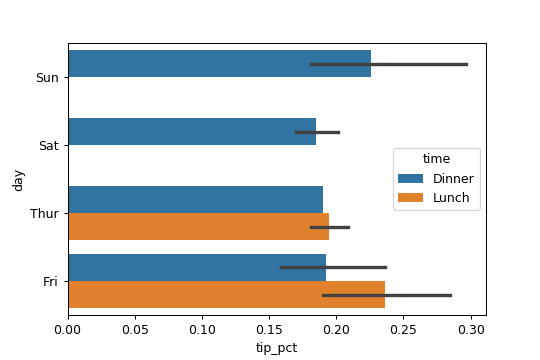

In [146]:
plt.subplots()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

>Note that *seaborn* has automatically changed the aesthetics of plots: the default color palette (调色板), plot background, and grid line colors. We can switch between different appearences using *seaborn.set*():  
*&emsp;&emsp;&emsp;sns.set(style='whitegrid')*

#### Histograms and Density Plots

A historam is a type of bar plot that gives a discretized display of value frequency. The data points are split into descrete, evenly spaced bins, and the number of data point in each bin is plotted. Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the *plot.hist*() method on the Series:

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


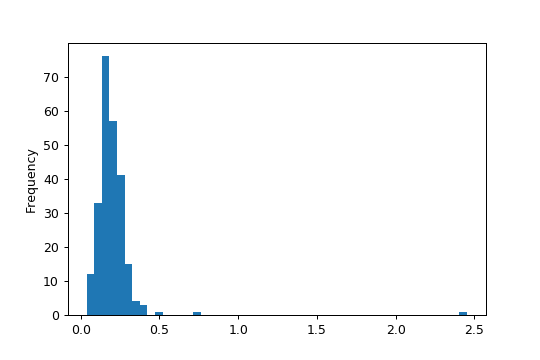

In [150]:
plt.subplots()
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a *density plot*, which is formed by compting an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as mixture of "kernels"--that is, simpler distribution like the normal distribution. Thus, density plot are also known as kernel density esitmate (KDE) plots. Using *plot.kde*() makes a density plot using the conventional mixture-of-normals estimate:

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


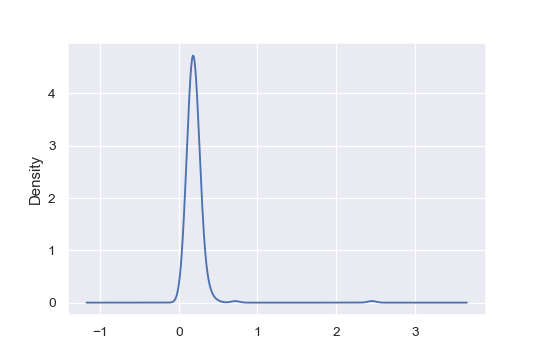

In [158]:
plt.subplots()
tips['tip_pct'].plot.density()
plt.grid(True)

*seaborn* makes historams and density plot easier through its *distplot*() method, which can plot both histogram and continuous density estimate simultaneously.  
  
As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions:

In [154]:
comp1 = np.random.normal(0, 1, size=200)

In [155]:
comp2 = np.random.normal(10, 2, size=200)


In [156]:
values = pd.Series(np.concatenate([comp1, comp2]))

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


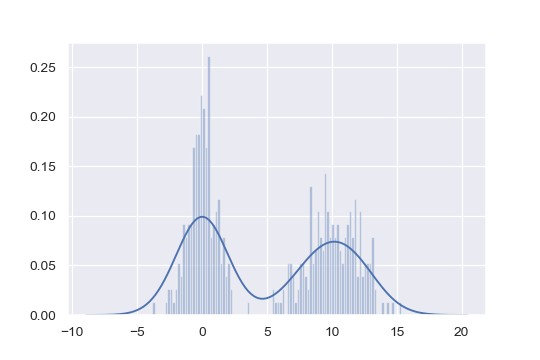

In [159]:
plt.subplots()
sns.distplot(values, bins=100, color='b')

#### Scatter or Point Plot

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. As an example, we load the *macrodata* dataset from the statsmodel project, select a few variables, then compute log differences:

In [161]:
macro = pd.read_csv('./examples/macrodata.csv')

In [163]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [164]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [165]:
trans_data = np.log(data).diff().dropna()

In [170]:
np.diff([1,4,8,4,7,6])

array([ 3,  4, -4,  3, -1])

In [171]:
trans_data[:3]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060


We can then use *seaborn*'s *regplot*() method, which makes a scatter and fits a linear regression line:

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


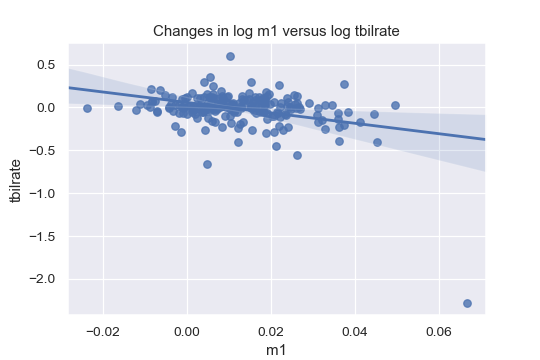

Text(0.5, 1.0, 'Changes in log m1 versus log tbilrate')

In [176]:
plt.subplots()
sns.regplot('m1', 'tbilrate', data=trans_data)
plt.title('Changes in log {} versus log {}'.format('m1', 'tbilrate'))

In exploratory data analysis it's helpful to be able to look at all the scatter plot amon a group of variables; this is known as a *pairs* plot or *scatter plot matrix*. Making such a plot from scratch is a bit of work, *seaborn* provides a convenient *pairplot*() function, which supports placing histograms or density estimates of each variables along the diagonal:

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


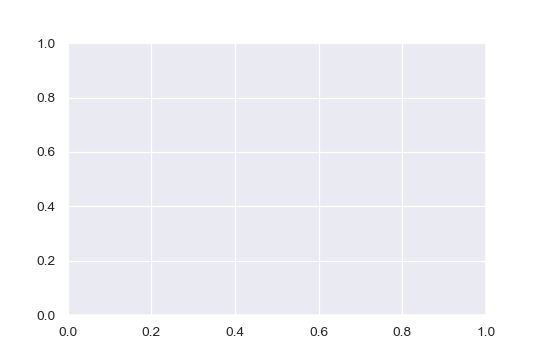

<IPython.core.display.Javascript object>


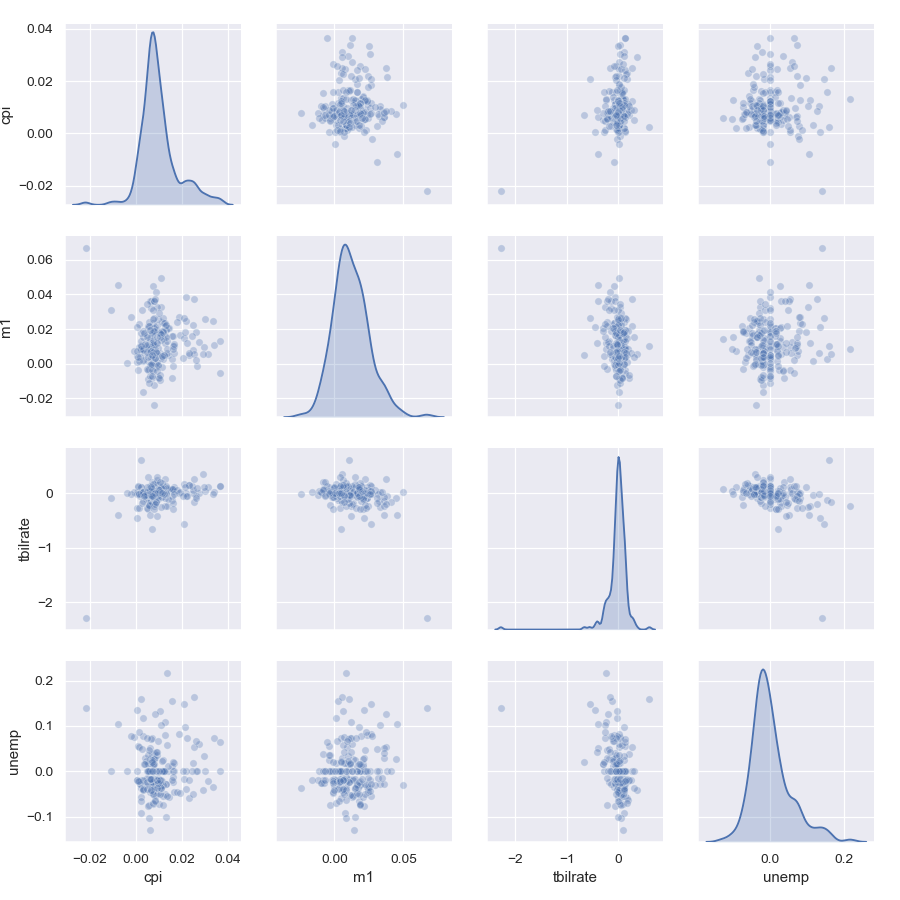

In [177]:
plt.subplots()
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.3})

>You may notice the *plot_kws* argument. This enables you to pass down configuration options to the individual plotting call on the off-diagonal elements.

#### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use *facet grid*. *seaborn* has a useful built-in function *factorplot*() that simplifies making many kinds of faceted plots:

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


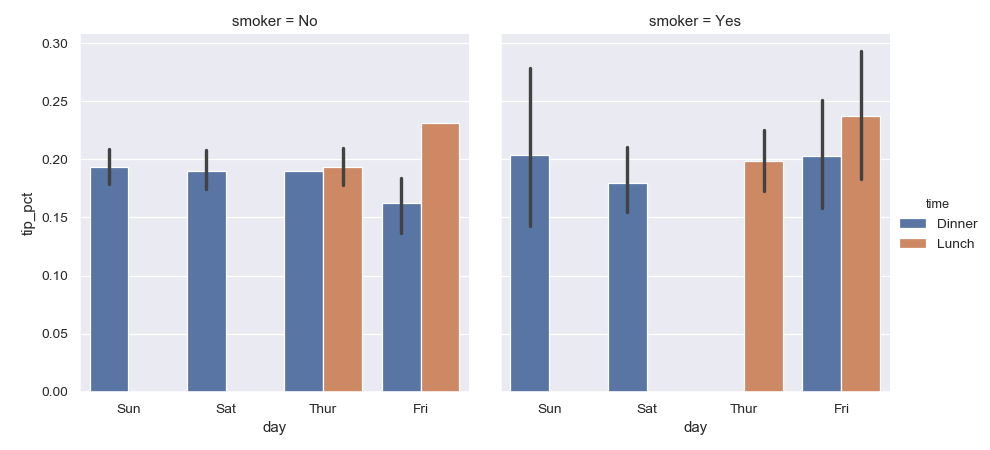

In [179]:

sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by "time" by different bar colors within a facet, we can also expand the facet grid by adding one row per time value:

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


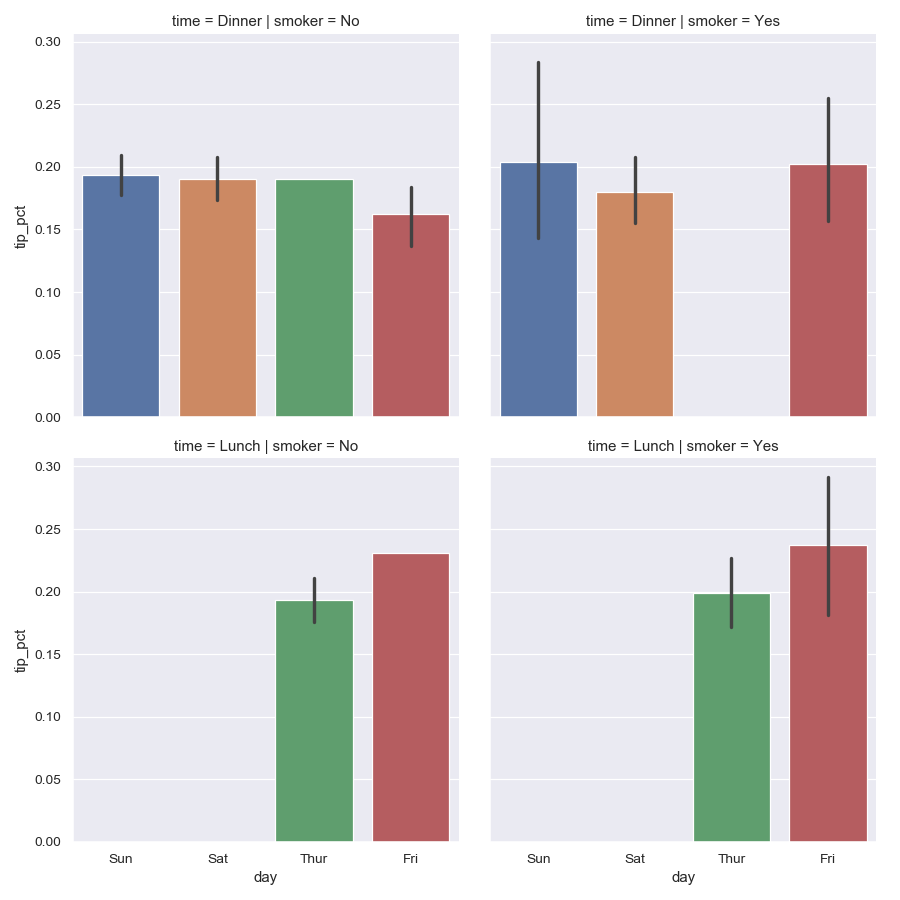

In [180]:
sns.factorplot(x='day', y='tip_pct', row='time',
              col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

*factorplot*() supports other plot types that may be useful depending on what you are trying to display. For example, box plots (箱线图, which show the median, quartiles, and outliers) can be an effective visualization type:

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


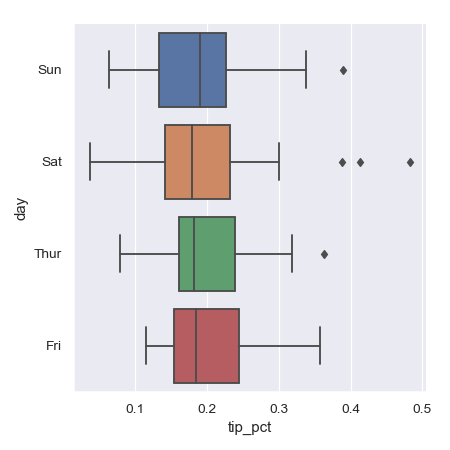

In [181]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

We can create our own facet grid plots using the more general *seaborn.FacetGrid* class.

#### Other Python Visualization Tool

As is common with open source, there are a plethora of options for creating graphics in Python(too many to list). Since 2010, much development effort has been focused on creating interactive graphics for publication on the web. With tools like Bokeh and Plotly, its now possible to specify dynamic, interactive graphics in Python that are destined for a web browser.  
For creating static graphics for print or web,I recommend defaulting to matplotlib and add-on libraries like pandas and seaborn for your needs. For other data visualization requirements, it may be useful to learn one of the other available tools out there. I encourage you to explore the ecosystem as it continues to involve and innovate into the future.

本章完结!